# Naive Bayes

## A simple example on a toy problem

### Exercise

Automatic text classification is one of the standard Machine Learning applications. Spam filtering was the first service based on Machine Learing used by almost every internet users.

We want to build a email classification system using a Naive Bayes classifier.
Emails must be classified into 2 different classes : *membership* or *complaint*.

 The classification will be based on the presence or absence of 3 words : 
 
 `join, address,  unacceptable, `
 
The training sample is composed of following documents, presented using a bag-of-word representation : 


join |  address | unacceptable  | class 
---|--------|-------|--------
1|1|0| membership
0|0|0| membership
1|1|0| membership
1|1|0| membership
1|1|0| membership
0|1|1| membership
1|1|0| membership
0|1|1| complaint
1|1|0| complaint
0|0|1| complaint
0|1|1| complaint
0|1|1| complaint
1|0|0| complaint





We denote by  $Y$ the document class and  $X=X_1,\cdots,X_3$ the bag of word features.

**Question**:
> * Compute the frequency tables for each event and each class
> 
> Class |  "join" present | "address" present  | "unacceptable" present 
> ---|--------|-------|--------
> membership | | |
> complaint | | |
>  
> * Divide the values in the table by the frequency of each class to compute P(word i is present|Y)
> * Compute the probability of P(word i is absent|Y) : this is 1-P(word i is present|Y)
> * Compute the prior  probabilities P(Y=membership) and P(Y=complaint)


We want to predict the class of the following document using a Naives Bayes classifier 

*Sir, I have a new problem with my account : I can not login. This is the third time this week that my account is down and I can join no one. This is unacceptable.*

In this text : "join" is present, "address" is not present and "unacceptable" is present

**Question**:
    
>Based on the probabilities computed before, compute the most probable class using the Bayes Formula :
>
> $$ P(Y | X_1,X_2,X_3) = \frac{P(X_1 | Y)P(X_2 | Y)P(X_3 | Y)P(Y)}{P(X)}$$

> To simplify the task, we have already computed  P(X) = 0.04203733
>
> You will have to compute  :
>
> * $P(Y = membership | X_1,X_2,X_3)$   = P("join" is present | Y = membership) \* P("address" is absent | Y = membership ) \* P("unacceptable" is present| Y = membership) \* P( Y = membership) / P(X)
> * $P(Y = complaint | X_1,X_2,X_3)$   = P("join" is present | Y = complaint) \* P("address" is absent | Y = complaint ) \* P("unacceptable" is present| Y = complaint) \* P( Y = complaint) / P(X)
> * and select the class with the maximal probability.
> 

In [54]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
    [1,1,0, 'membership'],
[0,0,0, 'membership'],
[1,1,0, 'membership'],
[1,1,0, 'membership'],
[1,1,0, 'membership'],
[0,1,1, 'membership'],
[1,1,0, 'membership'],
[0,1,1, 'complaint'],
[1,1,0, 'complaint'],
[0,0,1, 'complaint'],
[0,1,1, 'complaint'],
[0,1,1, 'complaint'],
[1,0,0, 'complaint'],
    ],
    columns=['join',  'address',  'unacceptable', 'class'],
)
import numpy as np
# Compute the frequence per event and per class
print (df.groupby('class').sum())
print ()
# Compute the frequency per class
#print (df['class'].value_counts())
sum = np.flip(np.tile(df['class'].value_counts().values, (3,1)).transpose(),axis=0)
print (sum)
print ()
# Compute the probability  per event and per class
p1 = df.groupby('class').sum().values  / sum
print ("P(X=1|C)")
print (p1)
print()
# Compute the probability of the complementary event

p0 = 1 - p1
print ("P(X=0|C)")
print (p0)
print ()

# Compute prior
prior = np.flip(df['class'].value_counts().values.reshape((2,1)),axis=0) / 13.
print ("Prior(C)")
print (prior)
print ()

# Calcul de P(X)
px = p1[0][0]*p0[0][1]*p1[0][2]*prior[0]+ p1[1][0]*p0[1][1]*p1[1][2]*prior[1]
print ("P(X)=",px)
print()

print ("calcul en log")
# Compute the log proba
lp0 = np.log(p0)
lp1 = np.log(p1)
# Compute the prior and log prior
prior = np.flip(df['class'].value_counts().values.reshape((2,1)),axis=0) / 13.
lprior = np.log(prior)
print (lp1)
print (lp0)
print (lprior)



            join  address  unacceptable
class                                  
complaint      2        4             4
membership     5        6             1

[[6 6 6]
 [7 7 7]]

P(X=1|C)
[[0.33333333 0.66666667 0.66666667]
 [0.71428571 0.85714286 0.14285714]]

P(X=0|C)
[[0.66666667 0.33333333 0.33333333]
 [0.28571429 0.14285714 0.85714286]]

Prior(C)
[[0.46153846]
 [0.53846154]]

P(X)= [0.04203733]

calcul en log
[[-1.09861229 -0.40546511 -0.40546511]
 [-0.33647224 -0.15415068 -1.94591015]]
[[-0.40546511 -1.09861229 -1.09861229]
 [-1.25276297 -1.94591015 -0.15415068]]
[[-0.77318989]
 [-0.61903921]]


In [75]:
classes_name = list(df.groupby('class').groups.keys())

for c in [0,1]:
    print (classes_name[c],end='=')
    print (p1[c][0]*p0[c][1]*p1[c][2]*prior[c]/px)


complaint=[0.81327801]
membership=[0.18672199]


### Code

The following DataFrame contains the data of the previous exercice. 

**Question**
> * Train a [Bernouilli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) on all the data.
> * Predict the class of the sample `sample = np.array([1,0,1])`, corresponding to the document of the previous excercise. 
> * Check your prediction with `clf.predict_proba([1,0,1])`
> * Check the different probabilities computed for the previous question :
>  * `clf.feature_count_` :  the count for each feature per class $C(X_i =1 \| Y=c)$
>  * `clf.feature_log_prob_` : the log probability for each feature per class $log(P(X_i =1 \| Y=c))$
>  * `clf.class_log_prior_` : the log prior probabilities for each class $log(P(Y=c))$
> * Check your prediction with `clf.predict_proba([1,0,1])` 



In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
    [1,1,0, 'membership'],
[0,0,0, 'membership'],
[1,1,0, 'membership'],
[1,1,0, 'membership'],
[1,1,0, 'membership'],
[0,1,1, 'membership'],
[1,1,0, 'membership'],
[0,1,1, 'complaint'],
[1,1,0, 'complaint'],
[0,0,1, 'complaint'],
[0,1,1, 'complaint'],
[0,1,1, 'complaint'],
[1,0,0, 'complaint'],
    ],
    columns=['join',  'address',  'unacceptable', 'class'],
)
df

,join,address,unacceptable,class
0,1,1,0,membership
1,0,0,0,membership
2,1,1,0,membership
3,1,1,0,membership
4,1,1,0,membership
5,0,1,1,membership
6,1,1,0,membership
7,0,1,1,complaint
8,1,1,0,complaint
9,0,0,1,complaint


In [4]:
# Check that we have the same result with BernoulliNB from sklearn
# Define the features and class
X = df[['join',  'address',  'unacceptable']]
y = df['class']
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0) # alpha = 0 to disable smoothing to compare with the previous exercise
clf.fit(X,y) # Your code here
print ("frequence per event and per class")
print (clf.feature_count_)
print ("proba per event and per class")
print (np.exp(clf.feature_log_prob_))
print ("class prior")
print (np.exp(clf.class_log_prior_))


frequence per event and per class
[[2. 4. 4.]
 [5. 6. 1.]]
proba per event and per class
[[0.33333333 0.66666667 0.66666667]
 [0.71428571 0.85714286 0.14285714]]
class prior
[0.46153846 0.53846154]


In [5]:
# create the vector for the text to be classified 
# "join" is present, address is absent and unacceptable is present -> [1,0,1]
sample = np.array([1,0,1])
# predict the class
print (clf.predict(sample.reshape(1, -1))) # reshape to avoid a warning
print (clf.classes_)
# predict the probability for each class
print (clf.predict_proba(sample.reshape(1, -1))) # reshape to avoid a warning

['complaint']
['complaint' 'membership']
[[0.81327801 0.18672199]]


## LeMonde2003 Dataset

We will now apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. The dataset can be dowloaded in  CSV format [here](https://kermorvant.github.io/csexed-ml/data/LeMonde2003_9classes.csv.gz).

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv` containing the articles using [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) . 
> * Plot the frequency histogram of the categories using [`countplot`](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`



In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
np.random.seed(42)
# load dataframe from CSV file
df = pd.read_csv('../data/LeMonde2003_9classes.csv.gz')
print (df.shape)
df.head()

(30165, 2)


,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


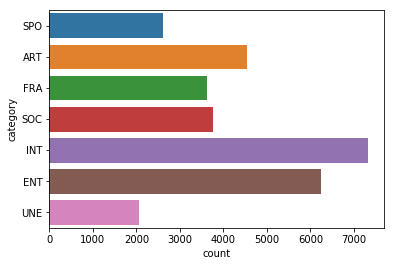

In [6]:
# Plot the statistics of category
sns.countplot(data=df,y='category')

In [7]:
# Print examples of the articles
print ("Category:",df.iloc[100]['category'])
print (df.iloc[100]['text'])
print ()
print ("Category:",df.iloc[10000]['category'])
print (df.iloc[10000]['text'])
print ()
print ("Category:",df.iloc[5008]['category'])
print (df.iloc[5008]['text'])


Category: ENT
un tribunal de l'illinois aux etats-unis a jugé philip morris premier cigarettier américain coupable d'avoir trompé les fumeurs en leur laissant croire que les cigarettes légères étaient plus saines que les normales philip morris a été condamné à payer 10,1 milliards de dollars de dommages et intérêts dont 7,1 milliards aux fumeurs et 3 milliards à l'etat de l'illinois

Category: ART
les deux sociétés civiles chargées de gérer les droits des artistes interprètes l'adami et la spedidam ainsi que deux syndicats d'artistes la sfa-cgt et le snam ont demandé l'arrêt immédiat de l'utilisation en france de dispositifs anti-copie sur le marché du disque ces organisations réclament également la suppression des mesures techniques de protection ... qui dégradent la copie obtenue utilisées par l'industrie du disque sous le prétexte de lutte contre la piraterie

Category: UNE
la prolongation de la guerre en irak affecte gravement la conjoncture économique publié lundi 31 mars l'indice

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 1000  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=1000)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train/dev/test set. 
> * For each set, transform the text of the articles into vectors using the `CountVectorizer` with `max_features=1000` words.



In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset (X and y together)
df_train, df_test = train_test_split(df ,test_size=0.20, random_state=42)
df_train_hyper, df_dev = train_test_split(df_train ,test_size=0.25, random_state=42)

print ('train size',df_train_hyper.shape)
print ('dev size', df_dev.shape)
print ('test size', df_test.shape)

train size (18099, 2)
dev size (6033, 2)
test size (6033, 2)


In [9]:
# create features X and target y
X_train = df_train_hyper.text
X_dev = df_dev.text
X_test = df_test.text
y_train = df_train_hyper.category
y_dev = df_dev.category
y_test = df_test.category

X_train_dev = df_train.text
y_train_dev = df_train.category


In [31]:
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# create the vectorizer object
vectorizer = CountVectorizer(max_features=2000)
# fit on train data
vectorizer.fit(X_train)
# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)


In [32]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 2000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [33]:
# Print one sample text
print (X_train.iloc[10000])
# and its Count (sparse) representation 
print (X_train_counts[10000])
# Inverse vocabulary 
terms = np.array(list(vectorizer.vocabulary_.keys()))
indices = np.array(list(vectorizer.vocabulary_.values()))
inverse_vocabulary = terms[np.argsort(indices)]
most_frequent = X_train_counts[10000].argmax()
print ("most frequent word =",inverse_vocabulary[most_frequent])

parmi les photos qui illustrent dans super warhol l'effervescence de la factory plusieurs ont saisi john cale et ses allures de comte transylvanien à la fin des années 1960 quand le gallois était l'inquiétant bassiste et altiste du velvet underground invité le 24 juillet à jouer sur la scène installée sous la verrière du grimaldi forum le chanteur sexagénaire nez busqué regard intense n'a pas l'air beaucoup plus commode qu'à l'époque où il insufflait au rock new-yorkais son goût des distorsions et de la musique répétitive hérité de sa fréquentation de créateurs comme john cage ou lamonte young en souvenir de ces années où par l'entremise d'andy warhol l'avant-garde artistique et la littérature côtoyaient pour la première fois le rock'n'roll john cale conduit de son alto électrique la procession décadente de venus in furs tiré de l'album fondateur the velvet underground nico quand lou reed jouissait de ces perversions avec une distance désincarnée cale suggère des tourments plus terrien

In [35]:
# define a mutlinomial Naive Bayes
clf = MultinomialNB()
# Train 
clf.fit(X_train_counts,y_train)
# Evaluate 
print ("Train accuracy",clf.score(X_train_counts,y_train))
print ("Dev accuracy",clf.score(X_dev_counts,y_dev))

Train accuracy 0.7633570915520195
Dev accuracy 0.7495441737112548


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
alpha = 0.001
max_words =2000
max_df = 1.0
min_df = 0.0
vectorizer = CountVectorizer(max_features=max_words,max_df=max_df,min_df=min_df)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
                 
clf = MultinomialNB(alpha=alpha)
clf.fit(X_train_tf, y_train)
predict_train = clf.predict(X_train_tf)
print ("Train score",accuracy_score(y_train,predict_train))
predict_dev = clf.predict(X_dev_tf)
print ("Dev score",accuracy_score(y_dev,predict_dev))

Train score 0.7855682634399691
Dev score 0.7724183656555611


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes.

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_dev,predict_dev))

             precision    recall  f1-score   support

        ART       0.78      0.91      0.84       870
        ENT       0.82      0.87      0.85      1301
        FRA       0.64      0.72      0.68       741
        INT       0.79      0.88      0.83      1445
        SOC       0.70      0.70      0.70       779
        SPO       0.92      0.83      0.87       472
        UNE       0.54      0.02      0.03       425

avg / total       0.76      0.77      0.75      6033



In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_dev,predict_dev)
print (conf_mat)

[[ 789   20   23   27    7    2    2]
 [  32 1134   49   56   24    6    0]
 [  14   52  531   46   95    3    0]
 [  23   68   44 1265   44    0    1]
 [  34   34  108   57  544    2    0]
 [  16   25    2   15   21  390    3]
 [  99   46   70  143   38   22    7]]


[[ 789   20   23   27    7    2    2]
 [  32 1134   49   56   24    6    0]
 [  14   52  531   46   95    3    0]
 [  23   68   44 1265   44    0    1]
 [  34   34  108   57  544    2    0]
 [  16   25    2   15   21  390    3]
 [  99   46   70  143   38   22    7]]


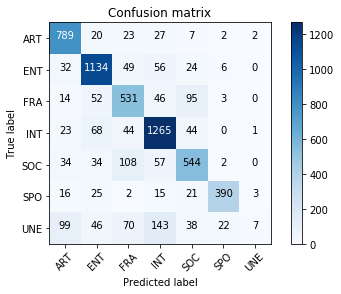

In [39]:
# Better display of the confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

  
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(conf_mat,classes=sorted(y_train.unique()))

## Hyperparameter optimization

The classification process has many parameters : alpha for the classifier, max_words, max_df, min_df, ngram orders for the Count of TfIDF transformer. These parameters can be optimized by a grid search using GridSearchCV.

In [14]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.0001, 0.001,0.01,0.1)
}
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train_dev[:1000], y_train_dev[:1000])
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.0001, 0.001, 0.01, 0.1),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.3s
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.4s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.1s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.1s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.1s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001,

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.1s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.5s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.0001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   4.5s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   4.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.9min
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is d

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.1s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.4s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   4.9s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.001, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.0min
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   4.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   4.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.1s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   4.6s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   4.4s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   4.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.4s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   4.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.9s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.4s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.5s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.4s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.01, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   5.8s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__u

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.6s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.1s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.4min
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l1, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   4.5s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   4.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   4.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=True, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.4s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.6s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.5, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=None, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.4s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=5000, vect__ngram_range=(1, 2), total=   3.5s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   1.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.2s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=10000, vect__ngram_range=(1, 2), total=   3.0s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=0.75, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   1.1s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.8s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.9s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 1), total=   0.8s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=None, vect__ngram_range=(1, 2), total=   3.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.8s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.6s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=5000, vect__ngram_range=(1, 2), total=   2.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=10000, vect__ngram_range=(1, 2), total=   2.3s
[CV] clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2) 
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 1), total=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.

[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.1s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   2.2s
[CV]  clf__alpha=0.1, tfidf__norm=l2, tfidf__use_idf=False, vect__max_df=1.0, vect__max_features=50000, vect__ngram_range=(1, 2), total=   1.9s


[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 13.1min finished


done in 787.355s

Best score: 0.787
Best parameters set:
	clf__alpha: 0.01
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 1.0
	vect__max_features: 50000
	vect__ngram_range: (1, 2)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [1]:
import pandas as pd
import ast
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
from keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)
from keras.callbacks import Callback
import os

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
MAX_FEATURES = 70000
MAX_TEXT_LENGTH = 1024
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [3]:
class TrainingHistory(Callback):
    
    def __init__(self, x_test, y_test, CLASSES_LIST):
        super(Callback, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.CLASSES_LIST = CLASSES_LIST
        
    def on_train_begin(self, logs={}):
        self.losses = []
        self.epoch_losses = []
        self.epoch_val_losses = []
        self.val_losses = []
        self.predictions = []
        self.epochs = []
        self.f1 = []
        self.i = 0
        self.save_every = 50

    def on_epoch_end(self, epoch, logs={}):
        
        y_predicted = self.model.predict(self.x_test).argmax(1)
        print(y_predicted.shape)
        
        print("Test Accuracy:", accuracy_score(self.y_test, y_predicted))
    
        p, r, f1, s = precision_recall_fscore_support(self.y_test, y_predicted, 
                                                      average='micro',
                                                      labels=[x for x in 
                                                              self.CLASSES_LIST 
                                                              if x not in ['CSDECMOTV', 'CSDECPUB', 'CSINSELECT']])
        
        print('p r f1 %.1f %.1f %.1f' % (np.average(p, weights=s)*100.0, 
                                         np.average(r, weights=s)*100.0, 
                                         np.average(f1, weights=s)*100.0))
        
        try:
            print(classification_report(self.y_test, y_predicted, labels=[x for x in 
                                                               self.CLASSES_LIST 
                                                               if x not in ['CSDECMOTV', 'CSDECPUB', 'CSINSELECT']]))
        except:
            print('ZERO')

In [10]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)


def get_y(train):
    
    CLASSES_LIST = np.unique(train)
    return train[CLASSES_LIST].values


def get_model():
    embed_size = 300
    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, embed_size)(inp)
    model = Dropout(0.2)(model)
    model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    #model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
    #model = MaxPooling1D(pool_size=2)(model)
    model = Flatten()(model)
    #model = GRU(128)(model)
    #model = Dense(64, activation="relu")(model)
    #model = Dense(32, activation="relu")(model)
    #model = Dense(16, activation="relu")(model)
    model = Dense(7, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    #model.load_weights(MODEL_FILE_PATH)
    return model.predict(x_test)


CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)

    
print(CLASSES_LIST)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)

y_train = le.transform(y_train) 
y_test = le.transform(y_test) 

train_y_cat = np_utils.to_categorical(y_train, n_out)


x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

#    y = get_y(train_y_cat)
model = get_model()
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))


['ART' 'ENT' 'FRA' 'INT' 'SOC' 'SPO' 'UNE']
18099 6033
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1024, 300)         21000000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024, 300)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1024, 32)          19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 512, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
____

KeyboardInterrupt: 